In [1]:
import os 
import pickle
import directories as dir
import networkx as nx
import community.community_louvain
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.cluster import *
from functions import labels_to_clusters, draw_graph

In [2]:
fname = os.path.join(dir.data_dir, "projected_graph_with_integer_labels.edgelist")
G = nx.read_weighted_edgelist(fname, nodetype=str)

In [3]:
fname = os.path.join(dir.data_dir, "ground_truth_clusters_pickle")
with open(fname, 'rb') as fp:
    clusters = pickle.load(fp)

ground_truth_label = {}

for i, cluster in enumerate(clusters):
    for v in cluster:
        ground_truth_label[v] = i

ground_truth_labels = []
for node in range(234):
    ground_truth_labels.append(ground_truth_label[node])

In [4]:
ground_truth_clusters = labels_to_clusters(ground_truth_labels)
ground_truth_clusters_size = [len(cluster) for cluster in ground_truth_clusters]


Different Resolution Values Comparison

In [5]:
res = np.arange(0, 1.05, 0.05)
n = res.shape[0]

In [6]:
modularity = np.zeros(n)
clusters = np.zeros(n, dtype=int)
mi = np.zeros(n)
nmi = np.zeros(n)
ami  = np.zeros(n)
rand  = np.zeros(n)
hom  = np.zeros(n)
comp = np.zeros(n)

In [7]:
for i in range(n):
  partition = community.community_louvain.best_partition(G, resolution=res[i])

  labels_pred = [partition[str(n)] for n in range(234)]
  clusters[i] = len(set(labels_pred))

  # metrics
  modularity[i] = community.community_louvain.modularity(partition, G, weight='weight')
  mi[i] = mutual_info_score(labels_pred, ground_truth_labels)
  nmi[i] = normalized_mutual_info_score(labels_pred, ground_truth_labels)
  ami[i] = adjusted_mutual_info_score(labels_pred, ground_truth_labels)
  rand[i] = rand_score(labels_pred, ground_truth_labels)
  hom[i] = homogeneity_score(labels_pred, ground_truth_labels)
  comp[i] = completeness_score(labels_pred, ground_truth_labels)

In [8]:
df = pd.DataFrame(zip(res, clusters, modularity, mi, nmi, ami, rand, hom, comp),
                              columns=['Resolution', 'Clusters', 'Modularity', 'MI', 'NMI', 'AMI', 'Rand', 'Hom', 'Comp'])
df

,Resolution,Clusters,Modularity,MI,NMI,AMI,Rand,Hom,Comp
0,0.00,3,0.003452,0.091574,0.129297,0.109982,0.492535,0.307271,0.081875
1,0.05,2,0.100992,0.436789,0.516229,0.510844,0.747735,0.761261,0.390528
2,0.10,3,-0.000128,0.016629,0.028339,0.012118,0.409963,0.301596,0.014868
3,0.15,3,-0.000020,0.026403,0.044996,0.029053,0.418253,0.478867,0.023607
4,0.20,2,-0.000006,0.016025,0.027966,0.019724,0.411210,0.581080,0.014328
5,0.25,3,0.000330,0.046314,0.071801,0.050513,0.437988,0.269852,0.041409
6,0.30,2,0.024183,0.171654,0.231231,0.221196,0.534500,0.468690,0.153474
7,0.35,4,0.129307,0.589537,0.658315,0.650970,0.832361,0.876518,0.527097
8,0.40,4,0.102731,0.421596,0.491201,0.479675,0.724442,0.704853,0.376944
9,0.45,4,0.125782,0.525511,0.592682,0.583817,0.802025,0.802461,0.469853


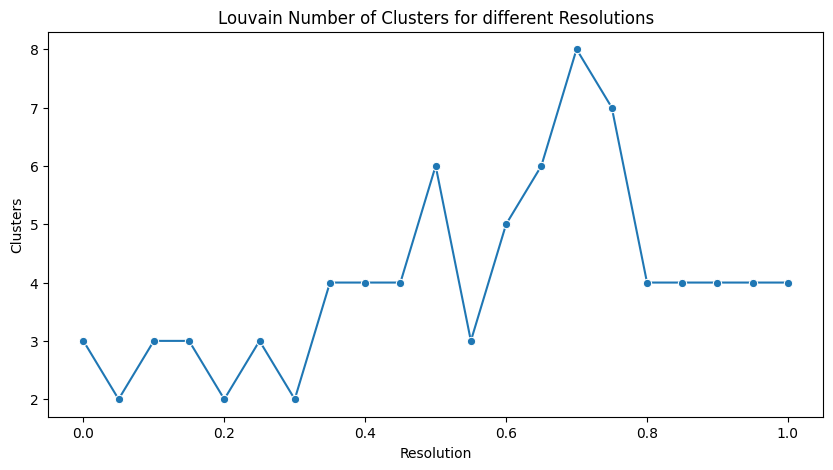

In [9]:
plt.figure(figsize=(10, 5))
sns.lineplot(x="Resolution", y="Clusters", data=df, marker="o")
plt.title('Louvain Number of Clusters for different Resolutions')
plt.show()

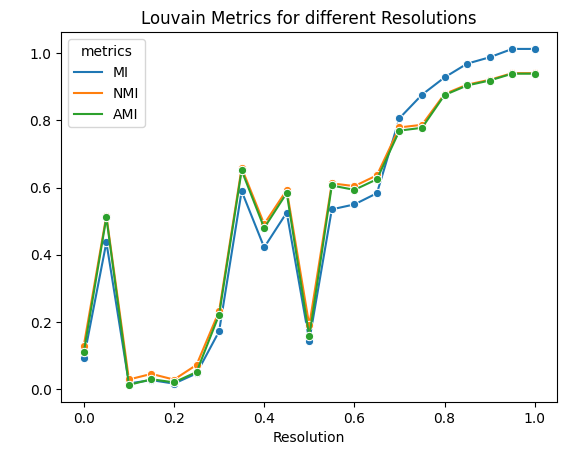

In [10]:
df_temp = df[['Resolution', 'MI', 'NMI', 'AMI']].melt('Resolution', var_name='metrics',
                                                                      value_name=' ')

sns.lineplot(x="Resolution",  y=" ", hue='metrics', data=df_temp, marker='o')
plt.title('Louvain Metrics for different Resolutions')
plt.show()

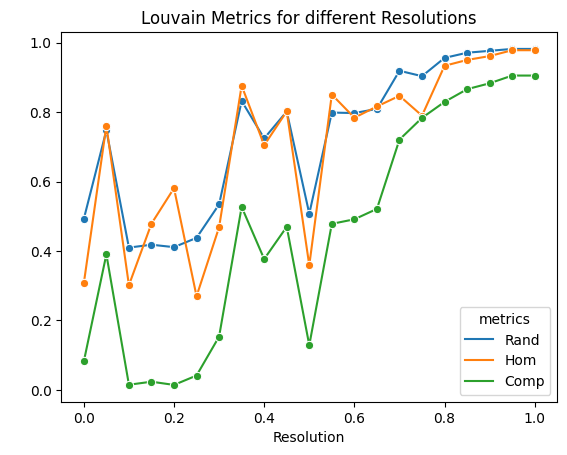

In [11]:
df_temp = df[['Resolution', 'Rand', 'Hom', 'Comp']].melt('Resolution', var_name='metrics',
                                                                      value_name=' ')

sns.lineplot(x="Resolution",  y=" ", hue='metrics', data=df_temp, marker='o')
plt.title('Louvain Metrics for different Resolutions')
plt.show()

Resolution = 0.95

In [12]:
partition = community.community_louvain.best_partition(G, resolution=0.95)
labels = [partition[str(n)] for n in range(234)]
louvain_clusters = labels_to_clusters(labels)
louvain_clusters_size = [len(cluster) for cluster in louvain_clusters]

print(f'Ground truth clusters: {ground_truth_clusters_size}')
print(f'Louvain clusters: {louvain_clusters_size}')

Ground truth clusters: [9, 131, 67, 6, 21]
Louvain clusters: [72, 131, 22, 9]


In [13]:
modularity = community.community_louvain.modularity(partition, G, weight='weight')
mi = mutual_info_score(labels, ground_truth_labels)
nmi  = normalized_mutual_info_score(labels, ground_truth_labels)
ami  = adjusted_mutual_info_score(labels, ground_truth_labels)
rand  = rand_score(labels, ground_truth_labels)
hom  = homogeneity_score(labels, ground_truth_labels)
comp = completeness_score(labels, ground_truth_labels)

Graph Visualisation

In [14]:
party_length = {}
for i in range(4):
  count = 0
  for val in partition.values():
      if val == i:
          count += 1
  party_length[i] = count

In [15]:
colors = {}

for k, v in party_length.items():
    if v == 9:
        colors[k] = 'k'
    elif v == 22:
        colors[k] = 'g'
    elif v == 72:
        colors[k] = 'r'
    else:
        colors[k] = 'b'

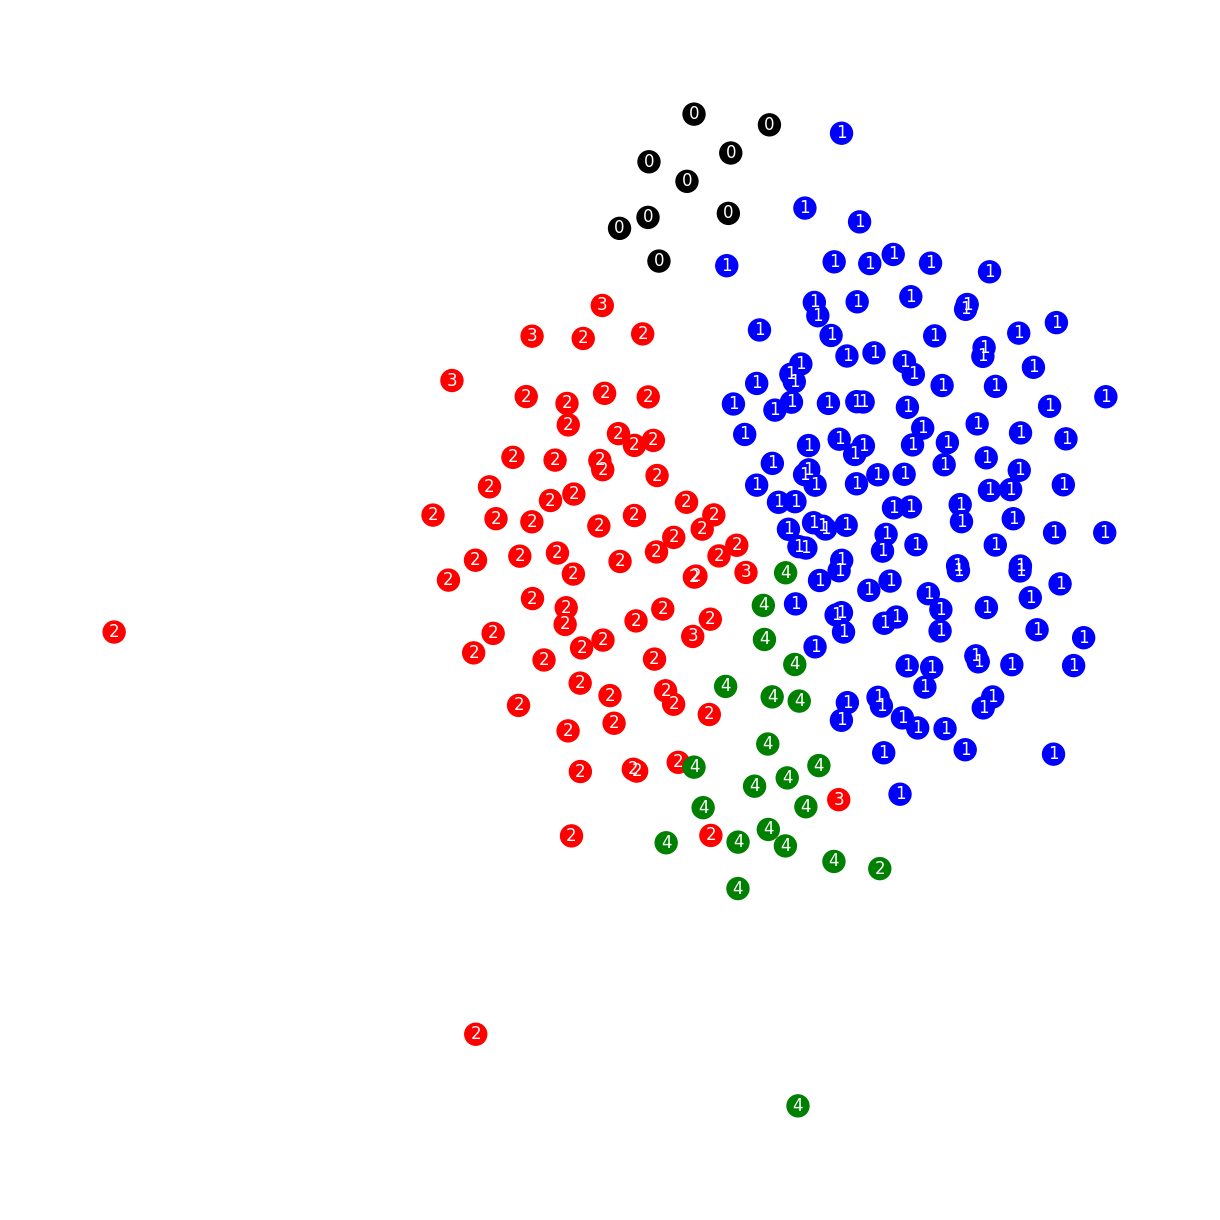

In [16]:
labels = {n: ground_truth_label[int(n)] for n in G.nodes()}
color_map = [colors[partition[n]] for n in G.nodes()]
draw_graph(G, labels, color_map)